In [1]:
## digit recognizer

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers,models,datasets
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns
from sklearn.metrics import confusion_matrix


In [5]:
import pandas as pd

In [7]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [10]:
x_train=x_train/255
x_test=x_test/255
x_train=x_train[...,np.newaxis].astype("float32")
x_test=x_test[...,np.newaxis].astype("float32")

In [11]:
model=models.Sequential([
    layers.Conv2D(64,(8,8),activation='relu',input_shape=(28,28,1)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10,activation='softmax')
])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(x_train,y_train,epochs=10,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 37ms/step - accuracy: 0.4860 - loss: 1.4315 - val_accuracy: 0.8982 - val_loss: 0.3356
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 38ms/step - accuracy: 0.8531 - loss: 0.4687 - val_accuracy: 0.9335 - val_loss: 0.2091
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.8938 - loss: 0.3473 - val_accuracy: 0.9515 - val_loss: 0.1526
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.9178 - loss: 0.2680 - val_accuracy: 0.9592 - val_loss: 0.1269
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.9265 - loss: 0.2432 - val_accuracy: 0.9662 - val_loss: 0.1091
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 38ms/step - accuracy: 0.9360 - loss: 0.2146 - val_accuracy: 0.9649 - val_loss: 0.1081
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.9421 - loss: 0.1943 - val_accuracy: 0.9693 - val_loss: 0.0946
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 38ms/step - accuracy: 0.9486 -

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9735 - loss: 0.0884
Test accuracy: 0.9754


In [16]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_split=0.1
)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 63s 37ms/step - accuracy: 0.9563 - loss: 0.1438 - val_accuracy: 0.9828 - val_loss: 0.0582
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 62s 37ms/step - accuracy: 0.9606 - loss: 0.1299 - val_accuracy: 0.9837 - val_loss: 0.0573
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 62s 37ms/step - accuracy: 0.9591 - loss: 0.1310 - val_accuracy: 0.9838 - val_loss: 0.0541
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 38ms/step - accuracy: 0.9621 - loss: 0.1273 - val_accuracy: 0.9827 - val_loss: 0.0583
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 65s 38ms/step - accuracy: 0.9633 - loss: 0.1217 - val_accuracy: 0.9838 - val_loss: 0.0558


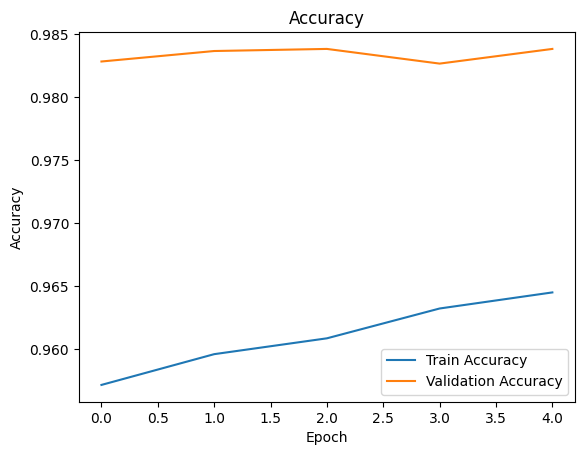

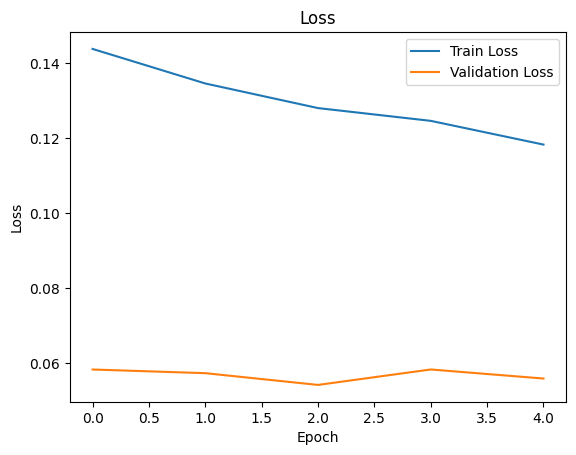

In [17]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [18]:
import numpy as np

y_pred_probs = model.predict(x_test)  # shape: (10000, 10)
y_pred = np.argmax(y_pred_probs, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


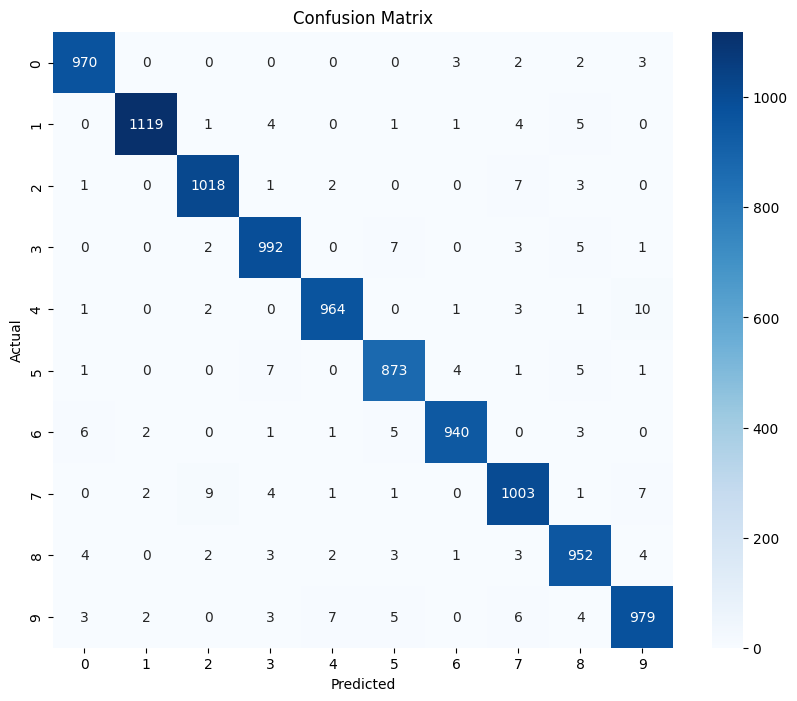

In [19]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [20]:
model.save("digit_cnn_model.h5")
